In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [23]:
im = Image.open('pas_foto.jpg').resize((255, 255))
print(im.format)
print(im.size)
print(im.mode)

None
(255, 255)
RGB


In [24]:
arr = np.array(im.copy())
print(type(arr))
print(arr.shape)

<class 'numpy.ndarray'>
(255, 255, 3)


In [25]:
arr80persen = arr.copy()
arr90persen = arr.copy()
arr110persen = arr.copy()
arr120persen = arr.copy()
keys = np.arange(256)
histOri = np.zeros((256),dtype=np.uint32)
hist80persen = np.zeros((256),dtype=np.uint32)
hist90persen = np.zeros((256),dtype=np.uint32)
hist110persen = np.zeros((256),dtype=np.uint32)
hist120persen = np.zeros((256),dtype=np.uint32)

In [26]:
for y in range(arr.shape[0]):
    for x in range(arr.shape[1]):
        akum = (int(arr[y,x,0])+int(arr[y,x,1])+int(arr[y,x,2]))
        tmp = max(min(int(akum/3),255),0)
        arr[y,x] = [tmp,tmp,tmp]
        tmp90persen = max(int(tmp*0.9),0)
        tmp80persen = max(int(tmp*0.8),0)
        arr90persen[y,x]=[tmp90persen,tmp90persen,tmp90persen]
        arr80persen[y,x]=[tmp80persen,tmp80persen,tmp80persen]
        tmp110persen = min(int(tmp*1.1),255)
        tmp120persen = min(int(tmp*1.2),255)
        arr110persen[y,x]=[tmp110persen,tmp110persen,tmp110persen]
        arr120persen[y,x]=[tmp120persen,tmp120persen,tmp120persen]
        histOri[tmp] = histOri[tmp]+1
        hist90persen[tmp90persen] = hist90persen[tmp90persen]+1
        hist80persen[tmp80persen] = hist80persen[tmp80persen]+1
        hist110persen[tmp110persen] = hist110persen[tmp110persen]+1
        hist120persen[tmp120persen] = hist120persen[tmp120persen]+1

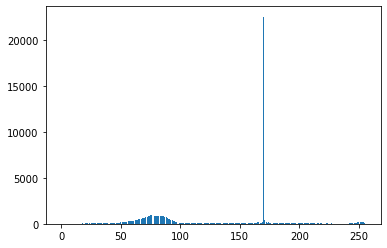

In [27]:
fig = plt.figure(1)
plt.bar(keys,histOri)
fig.canvas.draw()
dataOri = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
dataOri = dataOri.reshape(fig.canvas.get_width_height()[::-1] + (3,))
histImageOri = Image.fromarray(dataOri).resize((255, 255))
histNpOri = np.array(histImageOri)

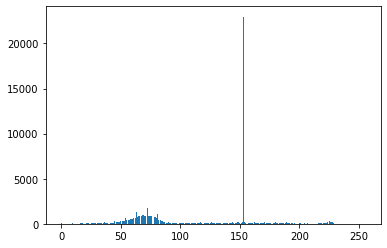

In [28]:
fig90persen = plt.figure(2)
plt.bar(keys,hist90persen)
fig90persen.canvas.draw()
data90persen = np.frombuffer(fig90persen.canvas.tostring_rgb(), dtype=np.uint8)
data90persen = data90persen.reshape(fig90persen.canvas.get_width_height()[::-1] + (3,))
histImage90persen = Image.fromarray(data90persen).resize((255, 255))
histNp90persen = np.array(histImage90persen)

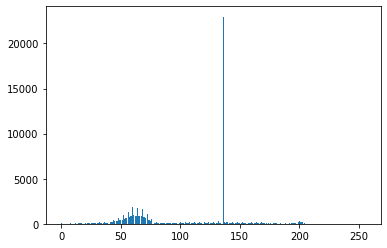

In [29]:
fig80persen = plt.figure(3)
plt.bar(keys,hist80persen)
fig80persen.canvas.draw()
data80persen = np.frombuffer(fig80persen.canvas.tostring_rgb(), dtype=np.uint8)
data80persen = data80persen.reshape(fig80persen.canvas.get_width_height()[::-1] + (3,))
histImage80persen = Image.fromarray(data80persen).resize((255, 255))
histNp80persen = np.array(histImage80persen)

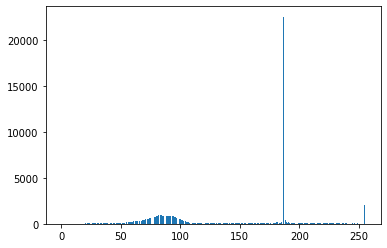

In [30]:
fig110persen = plt.figure(4)
plt.bar(keys,hist110persen)
fig110persen.canvas.draw()
data110persen = np.frombuffer(fig110persen.canvas.tostring_rgb(), dtype=np.uint8)
data110persen = data110persen.reshape(fig110persen.canvas.get_width_height()[::-1] + (3,))
histImage110persen = Image.fromarray(data110persen).resize((255, 255))
histNp110persen = np.array(histImage110persen)

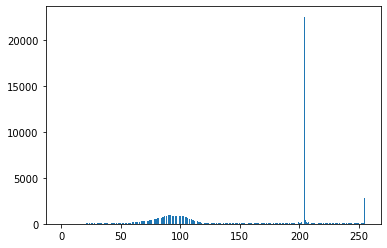

In [31]:
fig120persen = plt.figure(5)
plt.bar(keys,hist120persen)
fig120persen.canvas.draw()
data120persen = np.frombuffer(fig120persen.canvas.tostring_rgb(), dtype=np.uint8)
data120persen = data120persen.reshape(fig120persen.canvas.get_width_height()[::-1] + (3,))
histImage120persen = Image.fromarray(data120persen).resize((255, 255))
histNp120persen = np.array(histImage120persen)

In [32]:
histStack = np.hstack((histNp80persen,histNp90persen,histNpOri,histNp110persen,histNp120persen))
imageStack = np.hstack((arr80persen,arr90persen,arr,arr110persen,arr120persen))

In [34]:
Image.fromarray(np.vstack((histStack,imageStack))).show()